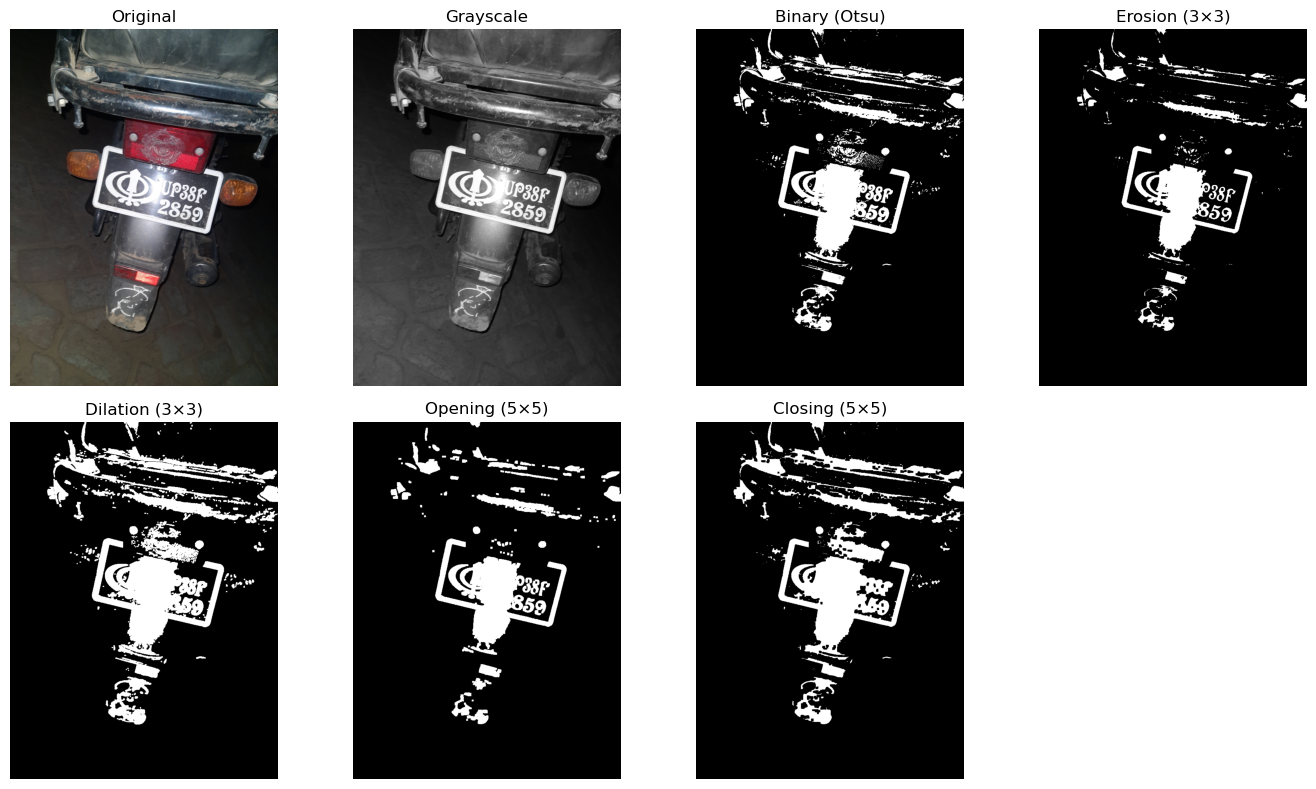

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show_grid(titles, imgs, max_cols=4, figsize=(14,8)):
    n = len(imgs); cols = min(max_cols, n); rows = (n+cols-1)//cols
    plt.figure(figsize=figsize)
    for i,(t,img) in enumerate(zip(titles, imgs), 1):
        plt.subplot(rows, cols, i)
        cmap = 'gray' if img.ndim == 2 else None
        if img.ndim == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap=cmap)
        plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

# Load and prep
bgr = cv2.imread(IMG_PATH)
if bgr is None: raise FileNotFoundError(IMG_PATH)
h,w = bgr.shape[:2]
scale = min(1.0, 720.0/min(h,w))
bgr = cv2.resize(bgr, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Binary mask for demonstration (Otsu)
_, bin_ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Structuring elements
ker3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
ker5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Basic morphology
erode3  = cv2.erode(bin_, ker3, iterations=1)
dilate3 = cv2.dilate(bin_, ker3, iterations=1)
open5   = cv2.morphologyEx(bin_, cv2.MORPH_OPEN, ker5, iterations=1)    # erode → dilate
close5  = cv2.morphologyEx(bin_, cv2.MORPH_CLOSE, ker5, iterations=1)   # dilate → erode

show_grid(
    ["Original", "Grayscale", "Binary (Otsu)", 
     "Erosion (3×3)", "Dilation (3×3)", "Opening (5×5)", "Closing (5×5)"],
    [bgr, gray, bin_, erode3, dilate3, open5, close5],
    max_cols=4, figsize=(14,8)
)
